# Import Libraries 

In [1]:
#import standard libraries 
import pandas as pd
import os 
import numpy as np
from PIL import Image
from sklearn import preprocessing
from pathlib import Path
from sklearn.model_selection import train_test_split

In [2]:
# import sklearn models and metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
#import conusion matrix (plot)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [4]:
# importing learning rate graph libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from sklearn import datasets
import matplotlib.pyplot as plt

# File path for data 

In [5]:
def file_path():    
    #current pathway
    path = (os.getcwd())
    #removing current folder from file path 
    main_folder_path = path.strip('\\A2') 
    return main_folder_path 

# Import Data

In [8]:
# load x train data
def import_x(main_folder_path):
    #get all images from file 
    def get_images(path):
        #create array to store all array from all images 
        all_images_as_array = []
        # for each image in folder 
        for filename in os.listdir(path):
            #open image
            img = Image.open(path+filename)
            #resize image to 64x64
            new_img = img.resize((64, 64))
            #convert image to array 
            np_array = np.asarray(new_img)
            #appenda array to array for all images 
            all_images_as_array.append(np_array)
        # output array for all images 
        return np.array(all_images_as_array)
    # file path to train data - call function 
    x_train = get_images(main_folder_path + '\\Datasets\\celeba\\img\\')
    #pre-processing data
    x_train = np.reshape(x_train, (x_train.shape[0], -1))
    #create normalisation scalar
    scaler = preprocessing.StandardScaler().fit(x_train)
    #apply scaler to the raining data 
    x_train_not_split = scaler.transform(x_train)
    #output training data 
    return x_train_not_split

In [9]:
# import y label train
def import_y(main_folder_path):
    #import labels csv file as pandas file 
    dataFrame = pd.read_csv(main_folder_path+'\\Datasets\\celeba\\labels.csv',header = None, prefix="data")
    #split data into columns for each label 
    dataFrame['data1']= dataFrame['data0'].str.split('\t')
    #label each of the columns 
    df3 = pd.DataFrame(dataFrame['data1'].to_list(), columns=['image_number','jpg','gender','smiling'])
    # replace -1 with 0 
    df3['smiling'] = df3['smiling'].replace(['-1'], '0')
    #order rows by image number - same order as image input 
    df3 = df3.sort_values(by ='image_number')
    #remove row 0
    df3 = df3.drop(0)
    #make label column numberic
    df3['smiling'] = pd.to_numeric(df3['smiling'])
    #create y vaiable 
    y_train_not_split = df3['smiling']
    #output y variable 
    return y_train_not_split

# Split data 

In [10]:
#split data 
def split_data(x,y):
    #split the training data to 80% training data and 20% validation 
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) 
    # retrun split data 
    return x_train,x_test,y_train,y_test 


# Import Test data 

In [11]:
# y test
def import_y_test(main_folder_path):
    #import csv label file 
    test_dataFrame = pd.read_csv(main_folder_path+'\\Datasets\\celeba_test\\labels.csv',header = None, prefix="data")
    #split data into column for each label 
    test_dataFrame['data1']= test_dataFrame['data0'].str.split('\t')
    #label each column 
    df3 = pd.DataFrame(test_dataFrame['data1'].to_list(), columns=['image_number','jpg','gender','smiling'])
    #replace each -1 label with 0
    df3['smiling'] = df3['smiling'].replace(['-1'], '0')
    #order label alphabetically so match with images 
    df3 = df3.sort_values(by ='image_number')
    #remove first row
    df3 = df3.drop(0)
    #convert to numerical values 
    df3['smiling'] = pd.to_numeric(df3['smiling'])
    #select smiling column ass y input
    y_test_test_data = df3['smiling']
    #output y values 
    return y_test_test_data

In [12]:
# load x test data
def import_x_test(main_folder_path):
    def get_images(path):
        #create array for all the image input 
        all_images_as_array = []
        #iterate over all files in the foler 
        for filename in os.listdir(path):
            #open the file 
            img = Image.open(path+filename)
            #resize to 64x64 image 
            new_img = img.resize((64, 64))
            #convert image to array
            np_array = np.asarray(new_img)
            # add array to array of all images 
            all_images_as_array.append(np_array)
        # output array of all images 
        return np.array(all_images_as_array)
    # get images from file path to folder containg images 
    x_test_test_data = get_images(main_folder_path+'\\Datasets\\celeba_test\\img\\')
    # pre-process the images 
    x_test_test_data = np.reshape(x_test_test_data, (x_test_test_data.shape[0], -1))
    #create normalisation sclaer 
    scaler = preprocessing.StandardScaler().fit(x_test_test_data)
    #scale x input to normalise all features 
    x_test_test_data = scaler.transform(x_test_test_data)
    #output x values 
    return x_test_test_data

# Final Model

In [13]:
# create finalised model 
def final_model(x_train, y_train):
    # create model with optimised parameters 
    models =RandomForestClassifier(max_depth=90, min_samples_leaf=5, min_samples_split=8, n_estimators=300)

    # Fit the classifier
    models.fit(x_train, y_train)
    #print the optimised model
    print('The optimised model used for A2 is', models)
    #output the model 
    return models

# Evaluating final model 

In [14]:
#asses  the final model 
def asses_model(models,x_test_test,y_test_test):
    

    # Make predictions
    predictions = models.predict(x_test_test)

    # Calculate metrics
    accuracy= accuracy_score(predictions, y_test_test)
    #print the accuracy of the model as a percentage 
    print('The accuracy for A2 is:',accuracy*100,'%')

    # plot confusion matrix 
    plot_confusion_matrix(models, x_test_test, y_test_test, cmap=plt.cm.Blues)  
    # show graph 
    plt.show()

In [15]:
# function to show final model and evalustion 
def A2(): 
    # find file path to the data (images and labels)
    main_folder_path = file_path()
    # import x values 
    x_train_not_split = import_x(main_folder_path)
    #import y values 
    y_train_not_split = import_y(main_folder_path)
    #split data 
    x_train,x_test,y_train,y_test=train_test_split(x_train_not_split,y_train_not_split,test_size=0.2) 
    #import y test values 
    y_test_test = import_y_test(main_folder_path)
    #import x test values 
    x_test_test = import_x_test(main_folder_path)
    #create the final optimiised model 
    models = final_model(x_train,y_train)
    #evaluate the final model 
    asses_model(models,x_test_test,y_test_test)                                        
    
    
    

C:\Users\Student\ELEC0134 ML CW\directory to extract
The optimised model used for A2 is RandomForestClassifier(max_depth=90, min_samples_leaf=5, min_samples_split=8,
                       n_estimators=300)
The accuracy for A2 is: 86.3 %


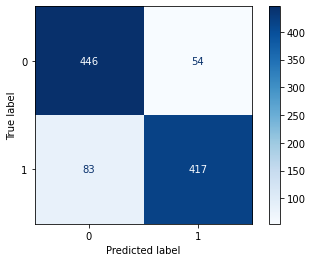

In [16]:
#run function for final model and its evaluation 
A2()

# Importing training data 

In [20]:
#function to import training data and split 
def import_X_Y():
    # find file path to the data (images and labels)
    main_folder_path = file_path()
    # import the x values
    x_train_not_split = import_x(main_folder_path)
    # import the y vlaues 
    y_train_not_split = import_y(main_folder_path)
    #split the training int otraining and validation datasets 
    x_train,x_test,y_train,y_test  = split_data(x_train_not_split,y_train_not_split)
    # output the validation and training sets 
    return x_train,x_test,y_train,y_test,x_train_not_split, y_train_not_split 

In [21]:
# run function to create the training and validation data sets 
x_train,x_test,y_train,y_test,x_train_not_split, y_train_not_split  = import_X_Y()

C:\Users\Student\ELEC0134 ML CW\directory to extract\


# CV to determine the most effective model

In [17]:
#CV_df = pd.DataFrame({"METHOD":[],"MEAN":[],"STD":[]})
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [23]:
#Logistic Regression 
# create model
model= LogisticRegression()
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# create dictary of results 
CV_df_LR = {'Method':'Logistic regression','MEAN':scores.mean(),'STD':scores.std()}


In [24]:
# Support vecotr machine 
#create vector 
model = LinearSVC()
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
#create dictionary of results 
CV_df_SV = {'Method':'Support Vector','MEAN':scores.mean(),'STD':scores.std()}

In [25]:
#Decision Tree
#create model 
model = DecisionTreeClassifier()
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# create a dicotnary of results 
CV_df_DT = {'Method':'Decision Tree','MEAN':scores.mean(),'STD':scores.std()}

In [26]:
#Random Forest 
#create model 
model =RandomForestClassifier()
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# create a dicotnary of results 
CV_df_RF = {'Method':'Random Forest','MEAN':scores.mean(),'STD':scores.std()}

In [27]:
#K nearest Neighbours 
#create model 
model = KNeighborsClassifier()
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# create a dicotnary of results 
CV_df_KN = {'Method':'K-Nearest Neighbors','MEAN':scores.mean(),'STD':scores.std()}#

In [28]:
#complie dicotaries into one list 
list_of_dict = CV_df_LR, CV_df_SV, CV_df_DT,CV_df_RF,CV_df_KN
# Create Dataframe from list of dictionaries and pass another list as index
df = pd.DataFrame(list_of_dict)
#print data frame 
df

,Method,MEAN,STD
0,Logistic regression,0.855417,0.014678
1,Support Vector,0.844583,0.017936
2,Decision Tree,0.754083,0.021169
3,Random Forest,0.840417,0.015372
4,K-Nearest Neighbors,0.630583,0.017074


# Random forest classifier hyperparameter tuning 

In [8]:

# Create the parameter grid based on the results of random search 
param_grid = {'bootstrap': [True],'max_depth': [80, 90, 100, 110, None],'max_features': [2, 3, 'auto'],'min_samples_leaf': [1, 2, 3, 4, 5],'min_samples_split': [2, 5, 8, 10, 12],'n_estimators': [10, 50, 100, 200, 300,]}

# Create a based model
rf =RandomForestClassifier()
#searcg through all parameters to find optimum model 
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [9]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
#select best parameter 
grid_search.best_params_
best_grid = grid_search.best_estimator_

Fitting 3 folds for each of 1875 candidates, totalling 5625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 56.3min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 80.7min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 105.8min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 157.7min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 225.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 264.7min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 353.0min
[Parallel(n_jobs=-1)]: Done 5625 out of 5625 | elapsed: 424.7min finished


In [6]:
#print best parameters 
best_grid

# Making learning rate plot 

In [8]:
#create data for all the iteration needed for the learning rate graph 
pipeline = make_pipeline(RandomForestClassifier(max_depth=90, min_samples_leaf=5, min_samples_split=8,n_estimators=300))
# crate output for the training, validation sets on various training sizes 
train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=x_train_not_split, y=y_train_not_split,cv=10, train_sizes=np.linspace(0.1, 1.0, 10),n_jobs=1)

In [9]:
#make datapoint for plot
#make training data points 
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
#make validation data points 
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

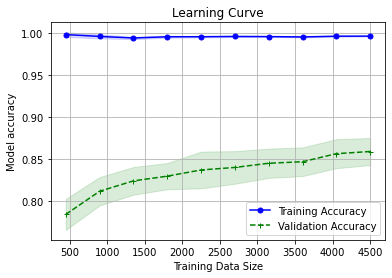

In [10]:
#plot learning graph 
# plot the training data for each of the trani sizes 
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
#add  standard deviation and fill in bluw 
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
# plot the validation results for the training 
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
#add standard deviation and colour area in green
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
#add labels to graph/axis
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
#add legend 
plt.legend(loc='lower right')
#print graph 
plt.show()